In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
f = pd.read_csv('landslide_data_miss.csv')

print(f[f['stationid'].isna()])

          dates stationid  temperature  humidity     pressure      rain  \
10   21-07-2018       NaN     23.89076  94.53782  1009.268067    735.75   
14   25-07-2018       NaN     23.18182  98.96970   800.000000       NaN   
170  29-08-2018       NaN     27.60563  80.99296  1012.834225     20.25   
174  02-09-2018       NaN     25.26667  88.57143  1012.892095      9.00   
215  03-08-2018       NaN     26.77305  90.69504  1008.012766      6.75   
259  22-09-2018       NaN     17.58571  99.00000  1018.952143    162.00   
266  29-09-2018       NaN     21.81690  86.06338  1018.630986      0.00   
283  16-10-2018       NaN     18.56028  63.29787  1020.489362      0.00   
338  22-10-2018       NaN     13.00000  61.03704  1053.282778      0.00   
383  26-07-2018       NaN     22.95556  99.00000  1007.257185   1111.50   
408  20-08-2018       NaN     25.06475  98.25899  1009.263885    220.50   
414  26-08-2018       NaN          NaN       NaN          NaN       NaN   
415  27-08-2018       NaN

In [2]:
# M-1
na_stationid_row = f[f['stationid'].isna()].index

f.drop(na_stationid_row,inplace=True) #inplace: Drop occur in real df if true on false return a new df
# M-2
f.dropna(subset='stationid',inplace=True)

na_stationid_row_updated = f[f['stationid'].isna()].index
print(na_stationid_row_updated)

Index([], dtype='int64')


In [3]:
Total_attributes = len(f.columns)
nan_count = f.isna().sum(axis=1)
f_more_than_threenan = f[nan_count>int(Total_attributes/3)]

print(f_more_than_threenan)

          dates stationid  temperature  humidity     pressure     rain  \
34   16-08-2018       t10          NaN       NaN          NaN      NaN   
37   19-08-2018       t10     23.34058       NaN          NaN      NaN   
42   24-08-2018       t10     21.92199  99.00000          NaN      NaN   
49   31-08-2018       t10     22.52143  99.00000          NaN      NaN   
50   01-09-2018       t10          NaN       NaN          NaN      NaN   
63   14-09-2018       t10     20.84211  98.14286  1015.972932      NaN   
66   17-09-2018       t10          NaN  90.54545          NaN      0.0   
81   02-10-2018       t10          NaN       NaN          NaN      NaN   
136  11-07-2018       t11          NaN       NaN          NaN      NaN   
244  07-09-2018       t12          NaN       NaN          NaN      NaN   
253  16-09-2018       t12          NaN       NaN          NaN      NaN   
367  06-07-2018       t14          NaN  67.31646   899.208797  80000.0   
368  07-07-2018       t14          NaN

In [4]:
f.drop(f_more_than_threenan.index,inplace=True)

In [5]:
nan_count = f.isna().sum(axis=1)
f_more_than_threenan = f[nan_count>3]
print(f_more_than_threenan)

Empty DataFrame
Columns: [dates, stationid, temperature, humidity, pressure, rain, lightavg, lightmax, moisture]
Index: []


# Interpolation

In [6]:
import pandas as pd
df = pd.read_csv('landslide_data_miss.csv')
original = pd.read_csv('landslide_data_original.csv')

cols = df.columns.tolist()

df

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,NaN
3,11-07-2018,t10,NaN,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,NaN,58.69630,1026.797407,73577.25,5521.1231,47460.0,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460.0,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460.0,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460.0,55.0286


In [7]:
def interpolation(cols):
    for index,row in df.iterrows():
        for j in cols:
            if(j!='stationid' and j!='dates'):
                if(pd.isna(row[j]) and index + 1<len(df['dates']) and index - 1>=0):
                    index_up = index - 1
                    index_down = index + 1

                    while(pd.isna(df.iloc[index_up][j]) and index_up>0): index_up-=1
                    while(pd.isna(df.iloc[index_down][j]) and index_down<len(df['dates'])): index_down+=1

                    valup = df.iloc[index_up][j]
                    valdown = df.iloc[index_down][j]

                    navalfill = ((valup - valdown)/(index_up - index_down))*(index - index_up) + valup

                    df.at[index,j] = navalfill

In [8]:
interpolation(cols)
df

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.00000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.69300
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,5.86515
3,11-07-2018,t10,24.61972,87.68657,1036.857463,963.00,8.8358,4000.0,6.03730
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.23850
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,13.80851,58.69630,1026.797407,73577.25,5521.1231,47460.0,54.42220
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460.0,54.56740
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460.0,54.87940
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460.0,55.02860


In [9]:
df.isnull().sum()

dates           0
stationid      19
temperature     0
humidity        0
pressure        0
rain            0
lightavg        0
lightmax        0
moisture        0
dtype: int64

In [10]:
original

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000,6.8511
3,11-07-2018,t10,24.29851,87.68657,1036.857463,963.00,8.8358,4000,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,16.65926,58.69630,1026.797407,73577.25,5521.1231,47460,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460,55.0286


In [11]:
df.describe()

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,21.196222,83.538245,1009.264758,10651.638370,4486.340772,21517.191005,32.327431
std,4.329504,18.206727,45.998792,24779.512082,7573.795424,21935.165741,33.602566
min,7.672900,31.000000,452.097887,0.000000,0.000000,2259.000000,0.000000
25%,18.314690,73.136805,1009.620000,0.000000,417.039200,4000.000000,2.993000
50%,22.169210,91.380950,1014.677832,22.500000,1623.494100,6569.000000,16.306600
75%,24.416670,98.605635,1020.820611,987.750000,4488.910300,54612.000000,64.535700
max,31.375000,99.720000,1079.162000,82037.250000,54612.000000,54612.000000,100.000000


In [12]:
original.describe()

,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
count,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,21.214888,83.479932,1009.008774,10701.538370,4438.428453,21788.623280,32.386053
std,4.355818,18.210065,46.980477,24852.255288,7573.162806,22064.993089,33.653245
min,7.672900,31.000000,452.097887,0.000000,0.000000,2259.000000,0.000000
25%,18.208630,72.751770,1009.511888,0.000000,417.039200,4000.000000,2.993000
50%,22.272730,91.380950,1014.677832,18.000000,1656.880000,6634.000000,16.704200
75%,24.390240,98.625950,1020.827589,1044.000000,4488.910300,54612.000000,64.671500
max,31.375000,99.720000,1079.162000,82037.250000,54612.000000,54612.000000,100.000000


# Stat Comparing: Orginal vs Interpolated


In [13]:
def stats(lst,col):
    std = pow(sum([(i - (sum(lst)/len(lst)))**2 for i in lst])/len(lst),0.5)
    sorted(lst) 
    median = lst[int(len(lst)/2)]
    print(f"Statistical measures for {col} = Mean: {round(sum(lst)/len(lst),2)}, Medain: {round(median,2)}, STD:{round(std,2)}")
    print()


def dataframe(real):
    stats(real['temperature'].tolist(),'temperature')
    stats(real['humidity'].tolist(),'humidity')
    stats(real['pressure'].tolist(),'pressure')
    stats(real['rain'].tolist(),'rain')
    stats(real['lightavg'].tolist(),'lightavg')
    stats(real['lightmax'].tolist(),'lightmax')
    stats(real['moisture'].tolist(),'moisture')
    
print("Stats for Interpolated Data :-")
dataframe(df)
print()
print()
print("Stats for Original Data :-")
dataframe(original)



Stats for Interpolated Data :-
Statistical measures for temperature = Mean: 21.2, Medain: 24.39, STD:4.33

Statistical measures for humidity = Mean: 83.54, Medain: 98.21, STD:18.2

Statistical measures for pressure = Mean: 1009.26, Medain: 1010.2, STD:45.97

Statistical measures for rain = Mean: 10651.64, Medain: 0.0, STD:24766.4

Statistical measures for lightavg = Mean: 4486.34, Medain: 1895.56, STD:7569.79

Statistical measures for lightmax = Mean: 21517.19, Medain: 27934.0, STD:21923.56

Statistical measures for moisture = Mean: 32.33, Medain: 21.18, STD:33.58



Stats for Original Data :-
Statistical measures for temperature = Mean: 21.21, Medain: 24.39, STD:4.35

Statistical measures for humidity = Mean: 83.48, Medain: 98.21, STD:18.2

Statistical measures for pressure = Mean: 1009.01, Medain: 1010.2, STD:46.96

Statistical measures for rain = Mean: 10701.54, Medain: 0.0, STD:24839.1

Statistical measures for lightavg = Mean: 4438.43, Medain: 1895.56, STD:7569.15

Statistical mea

# RMSE

In [14]:
def RMSE(rmse):
    for i in cols:
        if(i!='dates' and i!='stationid'):
            error = np.array(df[i]) - np.array(original[i])
            error_sq = np.square(error)
            sum_error_sq = pow((np.sum(error_sq)/len(df)) , 0.5)
            print(f"RMSE for {i} = {sum_error_sq}")
            rmse.append(sum_error_sq)
rmse = []
RMSE(rmse)


RMSE for temperature = 0.49039317926772374
RMSE for humidity = 0.8393130045849451
RMSE for pressure = 7.033471753292151
RMSE for rain = 1206.1476861370707
RMSE for lightavg = 1241.5914494441092
RMSE for lightmax = 3830.829336093958
RMSE for moisture = 1.27346446390451


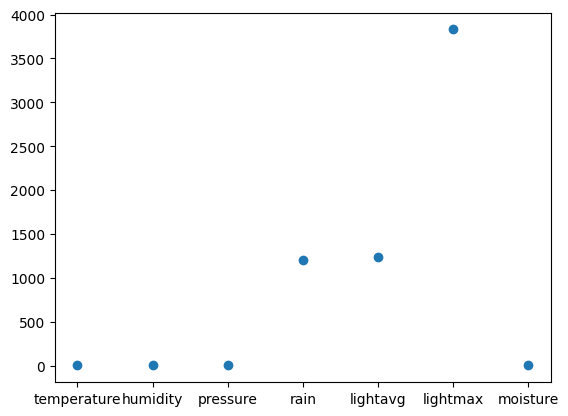

In [15]:
import matplotlib.pyplot as plt

plt.scatter(cols[2:],rmse)
plt.show()

# Part-3 Outliers


In [16]:
interpolated = df
col_list = interpolated.columns.tolist()[2:]

24.41667


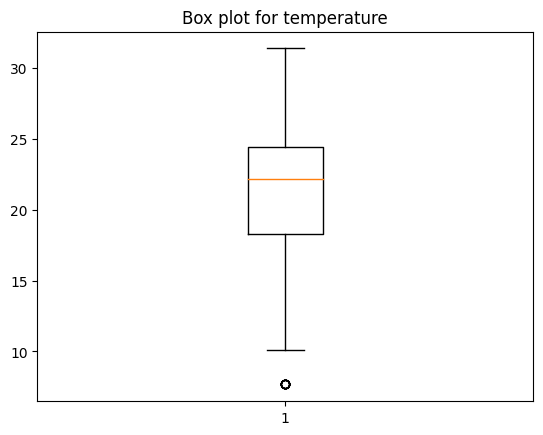

98.605635


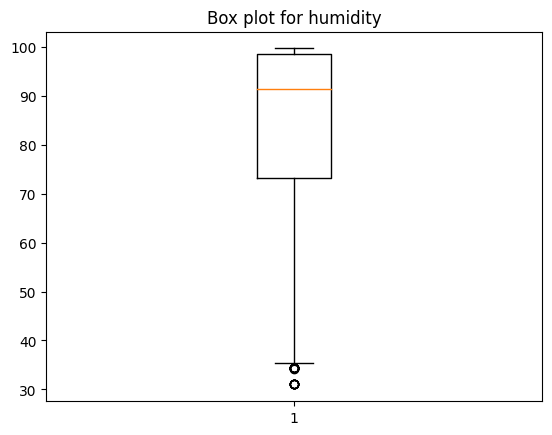

1020.820611


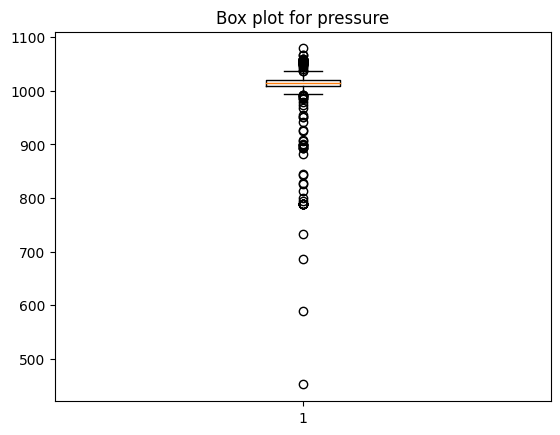

987.75


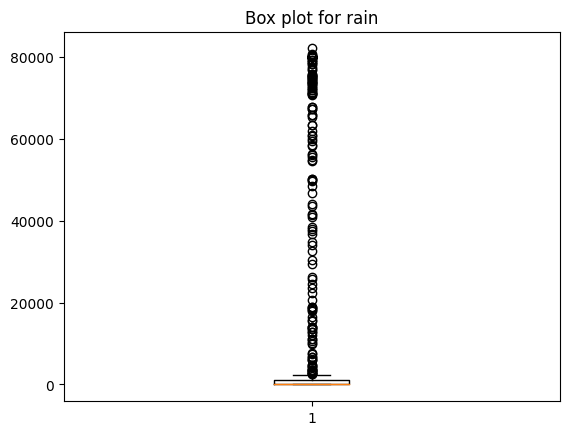

4488.9103


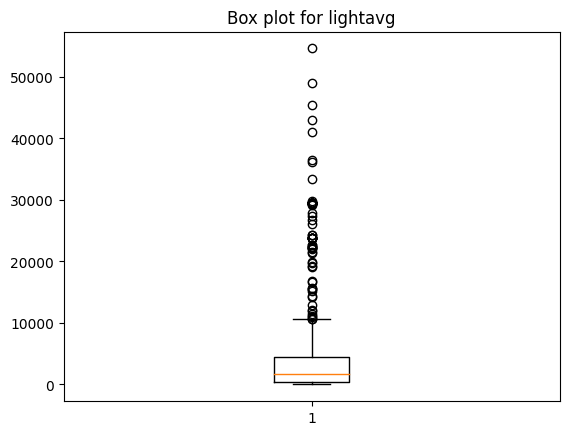

54612.0


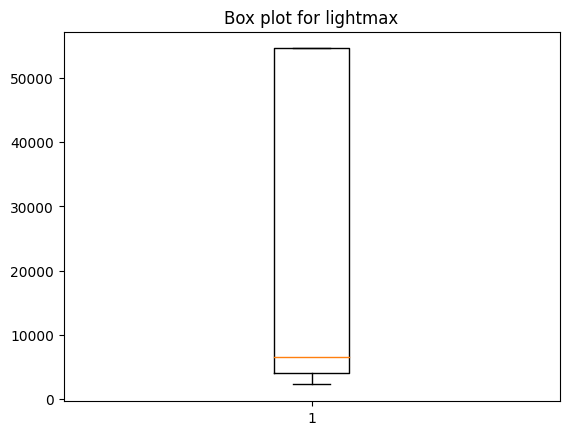

64.5357


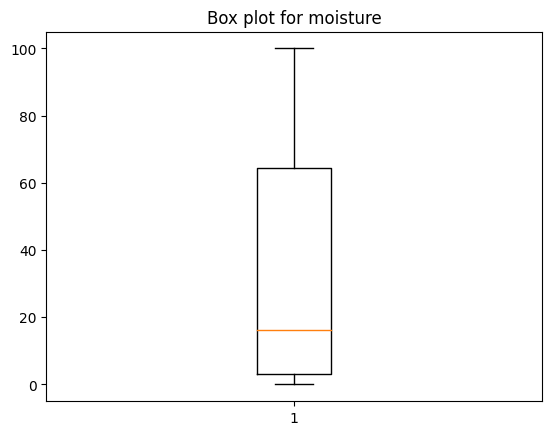

In [17]:

def outliers():

    for i in range(len(col_list)):
        data = interpolated[col_list[i]]
        Q1 = np.percentile(data,25)
        Q3 = np.percentile(data,75)
        print(Q3)
        IQR = Q3 -Q1
        outliers = [j for j in data if j< Q1 - 1.5*IQR or j>Q3 + 1.5*IQR]
        plt.boxplot(data)
        plt.title(f"Box plot for {col_list[i]}")
        plt.show()
        
outliers()


6.101980000000001


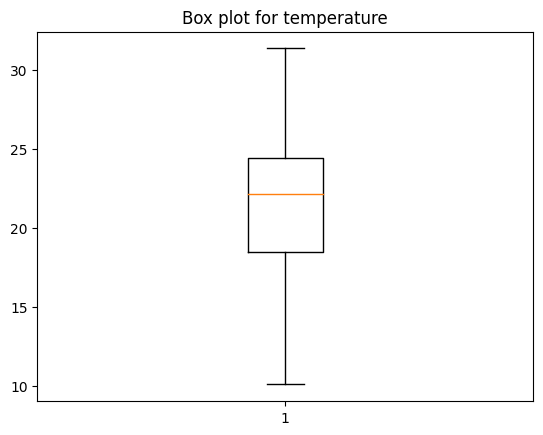

25.468829999999997


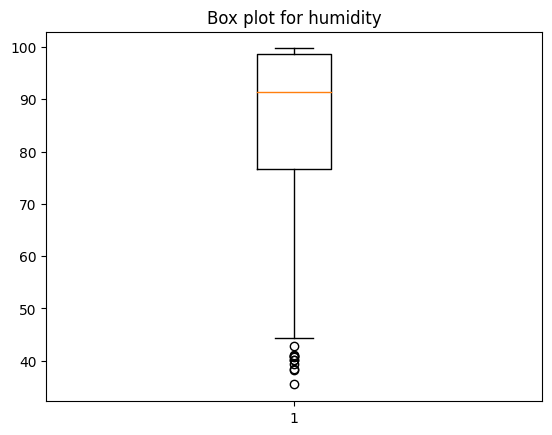

11.20061099999998


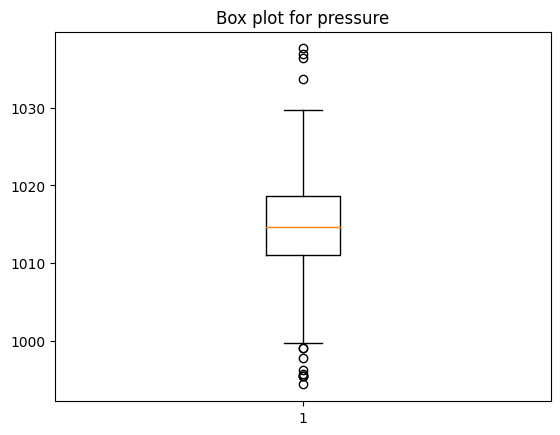

987.75


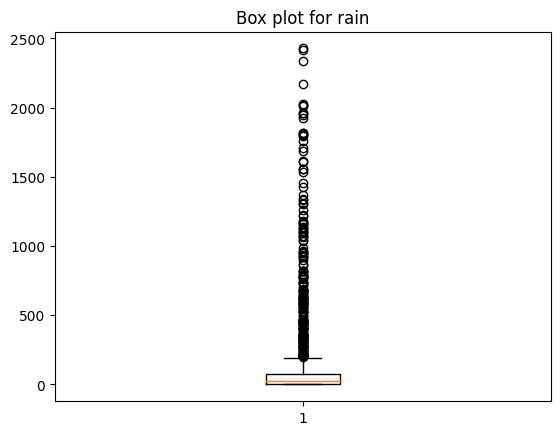

4071.8710999999994


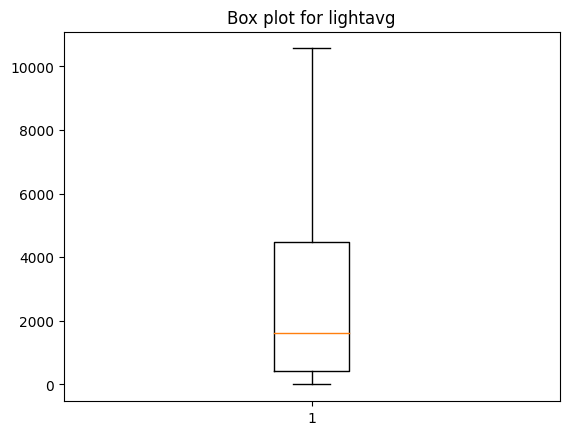

50612.0


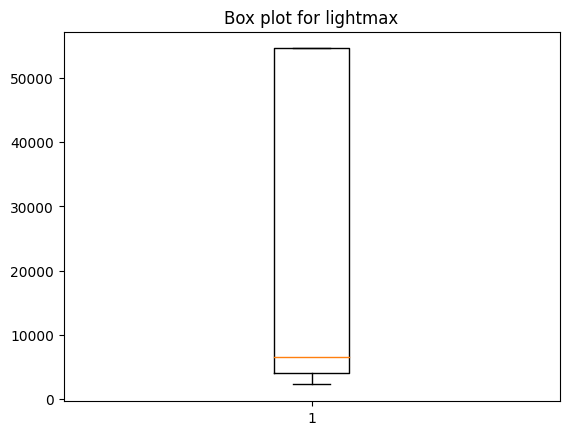

61.5427


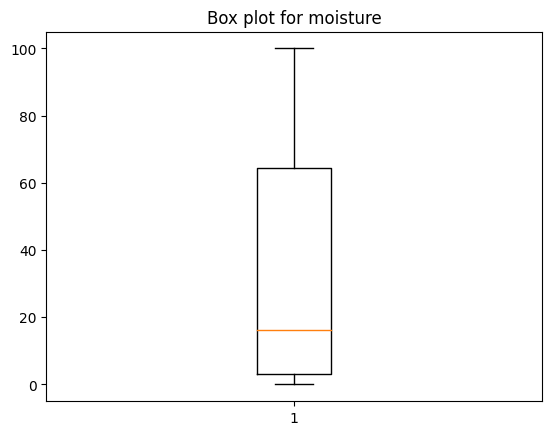

In [18]:
updated_data = []

def outliers_updated():

    for i in range(len(col_list)):
        data  = interpolated[col_list[i]].tolist()
        sorted_data = sorted(data)

        Q1 = np.percentile(data,25)
        Q3 = np.percentile(data,75)
        IQR = Q3 -Q1
        print(IQR)

        median = sorted_data[len(data)//2]
        updated = [median if j< Q1 - 1.5*IQR or j>Q3 + 1.5*IQR else j for j in data]

        updated_data.append(updated)
        
        plt.boxplot(updated)
        plt.title(f"Box plot for {col_list[i]}")
        plt.show()

outliers_updated()

# Standardization/Normalization

Normalization

In [19]:
def min_max_normalization(upper,lower):
    for i in range(len(col_list)):
        data = updated_data[i]
        normalized = [((i - min(data))/(max(data) - min(data)))*(upper - lower) + lower for i in data]

        print(f"Normalized data: Max = {max(normalized)}, Min = {min(normalized)}")
        
min_max_normalization(5,12)

Normalized data: Max = 12.0, Min = 5.0
Normalized data: Max = 12.0, Min = 5.0
Normalized data: Max = 12.0, Min = 5.0
Normalized data: Max = 12.0, Min = 5.0
Normalized data: Max = 12.0, Min = 5.0
Normalized data: Max = 12.0, Min = 5.0
Normalized data: Max = 12.0, Min = 5.0


Standardization

In [20]:
def standardization():
    for i in range(len(col_list)):
        data = np.array(updated_data[i])
        print(f"Before Standardization:: Mean: {np.mean(data)}, Std = {np.std(data)}")
        standardized = (data - np.mean(data))/np.std(data)
        print(f"After Standardization:: Mean: {np.mean(standardized)}, Std = {np.std(standardized)}")
        print()
standardization()


Before Standardization:: Mean: 21.349622566137565, Std = 4.095853517444963
After Standardization:: Mean: 1.9549323946838736e-16, Std = 0.9999999999999998

Before Standardization:: Mean: 85.49985484656085, Std = 15.631820601312581
After Standardization:: Mean: -2.782019177050128e-16, Std = 1.0

Before Standardization:: Mean: 1014.8420184663756, Std = 6.092421735932816
After Standardization:: Mean: 3.36849889545529e-15, Std = 1.0

Before Standardization:: Mean: 170.203582010582, Std = 386.1799531965627
After Standardization:: Mean: 1.1278456123176193e-17, Std = 1.0

Before Standardization:: Mean: 2244.662718306878, Std = 2220.8928272139588
After Standardization:: Mean: 2.2556912246352387e-17, Std = 1.0

Before Standardization:: Mean: 21517.191005291006, Std = 21923.556761533942
After Standardization:: Mean: -1.3534147347811433e-16, Std = 1.0

Before Standardization:: Mean: 32.32743126984127, Std = 33.584781821414396
After Standardization:: Mean: -3.007588299513652e-17, Std = 1.0

